<a href="https://colab.research.google.com/github/Chromatina/su-mt4007/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Task 1

In [7]:
df = pd.read_csv("covtype.csv")
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


# Task 2

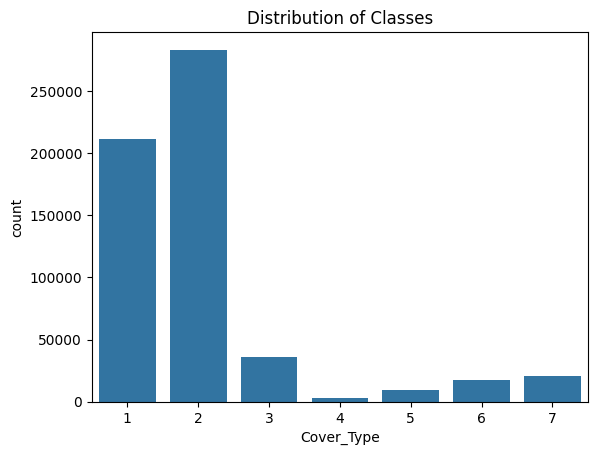

In [8]:
sns.countplot(x="Cover_Type", data=df)
plt.title("Distribution of Classes")
plt.show()

From the plot above we see that class 1 and 2 represent the majority of the data, in this case class imbalance is an issue since the network could simply ignore the other classes and only make predictions on the first two. Since the first two classes represent about 85% of the data (see print-out below), the model would be correct 85% of the time (if it correctly classifies these two classes of course) but it would be terrible at classifiying new data into the other five classes. To summarise, the model would ignore the majority of our classes and still make good predictions, although faulty predictions.

In [9]:
class_proportions = df["Cover_Type"].value_counts(normalize=True)
print("Class 1 and 2 represent", round((class_proportions[1] + class_proportions[2]) * 100, 1), "% of the data.")

Class 1 and 2 represent 85.2 % of the data.


# Task 3

We standardize all the features but not the targets in the column "Cover_Type".

In [10]:
features = df.drop("Cover_Type", axis=1)
mean = np.mean(features, axis=0)
std = np.std(features, axis=0)
standardized_features = (features - mean) / std
standardized_df = standardized_features.assign(Cover_Type=df["Cover_Type"])
standardized_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,5
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,5
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,-2.012130,-0.023740,0.787408,-0.867697,-0.504653,-1.437962,1.040496,0.692069,-0.640851,-0.863386,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581008,-2.029988,-0.032675,0.653865,-0.952383,-0.590424,-1.446299,1.040496,0.692069,-0.614724,-0.857345,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581009,-2.047847,0.029873,0.386780,-0.985317,-0.676194,-1.449506,0.891075,0.894409,-0.327327,-0.850548,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581010,-2.054990,0.128163,0.119694,-0.985317,-0.710502,-1.449506,0.666942,1.096749,0.012325,-0.842997,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3


# Task 4

Standardization is important because if some our inputs are significantly larger than the rest, then multiplying them by the weights will result in much larger outputs and thus uneven performance of our model. The weights for the larger inputs (features) will affect the loss much more than the weights for the inputs with much smaller scale. We should always standardize our dataset after splitting the data. This is because if we standardize the data before splitting it, then the training data will have "seen" the mean and standard deviation of the whole dataset which includes the testing and validation sets. The testing set should be completely new and unseen to the training set and if this is not the case, it could lead to the models performance seeming better than it actually is.

# Task 5

In [11]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

# We use stratify=y to ensure the imbalanced classes are distributed evenly
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

scaler = StandardScaler()

# We "fit" only on the training data to learn the mean and std dev
X_train_scaled = scaler.fit_transform(X_train)

# We "transform" validation and test sets using the training parameters
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Task 6



*   Depth: Our network has 5 layers, if we do not count the input layer (4 hidden layers and one output layer). We chose this depth because it is deep enough to learn our dataset and it gave us lower training- and validation error than our previous 4 layer model. Furthermore, it did not feel necessary to increase the depth since our training- and validation errors were sufficient enough.  
*   Width: The width of our network is 128. We chose this width since it is a power of two which computers handle more efficiently than non-powers of two. Moreover, the width is roughly two times larger than our input layer which has 54 features and this enables the "barrel" shape of our network.  
*   Activation function: We choose the ReLU activation function since it is computationally efficient and it solves the vanishing gradient problem where the gradient of other activation functions such as sigmoid, approaches zero for large positive inputs.   
*   Cost function: We use cross-entropy as our cost function as it is measures the difference between the networks guesses and the actual class labels whilst greatly punishing confident although wrong predictions. Furthermore, it avoids slow learning by using a logarithmic function which increases the gradients when the errors are high.
*   Output function: We use the softmax function on our last layer to transform the logits (the output of the output layer) to probabilities so that we humans can interpret the results better. The softmax function is embedded in the CrossEntropyLoss() function from PyTorch and is therefore not visible in the code.
*   Parameter initialization: We use Kaiming initialization to initialize our weights (default in PyTorch) since if we would initialize our weights to be zero for example, then they would all learn the same thing and the model would never improve. Kaiming ensures that the weights are generated from a normal distribution with mean zero and a standard deviation that depends on the number of inputs to that node. This method is also the standard one if the network is using ReLU as the activation function for the hidden layers.
*   Training algorithm: We use Adam together with backpropagation to train our model. We specifically chose Adam as our optimizer since it updates the learning rate for each parameter (the weights and biases) in our model which means that if some weights only move a tiny amount then Adam makes sure that they get an increase, a "push" and vice versa.


In [17]:
# This checks if a GPU is available to increase performance
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Prepare the labels (subtract 1 for 0-6 indexing)
y_train_np = y_train.values - 1
y_val_np = y_val.values - 1
y_test_np = y_test.values - 1

# Convert directly to PyTorch Tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.long)

X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_np, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_np, dtype=torch.long)

# Create Datasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=1024)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=1024)

In [13]:
# Define the architecture
class CovertypeNet(nn.Module):
    def __init__(self, input_size):
        super(CovertypeNet, self).__init__()
        # Define the layers
        self.layer1 = nn.Linear(input_size, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 32)
        self.layer5 = nn.Linear(32, 7) # 7 classes
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.layer5(x)
        return x

# Initialize the model
model = CovertypeNet(input_size=X_train_scaled.shape[1]).to(device)

In [14]:
# Calculate weights to solve class imbalance
class_counts = np.bincount(y_train_np)
weights = 1.0 / class_counts
weights = torch.tensor(weights, dtype=torch.float32)
weights = weights.to(device) # Move weights to GPU

# Loss and Optimizer
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store metrics for plotting
train_errors, val_errors = [], []

epochs = 400
for epoch in range(epochs):
    # TRAINING
    model.train()
    train_correct, train_total = 0, 0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate Accuracy
        _, predicted = torch.max(outputs.data, 1) # Get the index of the max logit
        train_total += batch_y.size(0)
        train_correct += (predicted == batch_y).sum().item()

    train_errors.append(100 * (1 - train_correct / train_total)) # Error = 1 - Accuracy

    # VALIDATION
    model.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)

            # Calculate Accuracy
            _, predicted = torch.max(outputs.data, 1)
            val_total += batch_y.size(0)
            val_correct += (predicted == batch_y).sum().item()

    val_errors.append(100 * (1 - val_correct / val_total))

Epoch [1/400] | Train Loss: 44.3808 | Val Loss: 38.6086
Epoch [2/400] | Train Loss: 36.3224 | Val Loss: 36.6190
Epoch [3/400] | Train Loss: 33.6872 | Val Loss: 32.8067
Epoch [4/400] | Train Loss: 32.0863 | Val Loss: 30.8446
Epoch [5/400] | Train Loss: 30.5790 | Val Loss: 29.3730
Epoch [6/400] | Train Loss: 29.3357 | Val Loss: 27.9737
Epoch [7/400] | Train Loss: 27.9898 | Val Loss: 29.8050
Epoch [8/400] | Train Loss: 27.1445 | Val Loss: 27.0959
Epoch [9/400] | Train Loss: 25.9048 | Val Loss: 28.3455
Epoch [10/400] | Train Loss: 25.0735 | Val Loss: 24.1183
Epoch [11/400] | Train Loss: 24.3810 | Val Loss: 22.3507
Epoch [12/400] | Train Loss: 23.4729 | Val Loss: 23.6726
Epoch [13/400] | Train Loss: 23.0320 | Val Loss: 21.5125
Epoch [14/400] | Train Loss: 22.2769 | Val Loss: 21.1442
Epoch [15/400] | Train Loss: 21.7902 | Val Loss: 22.8860
Epoch [16/400] | Train Loss: 21.1586 | Val Loss: 20.2217
Epoch [17/400] | Train Loss: 20.8524 | Val Loss: 19.5418
Epoch [18/400] | Train Loss: 20.0777 | V

# Task 7

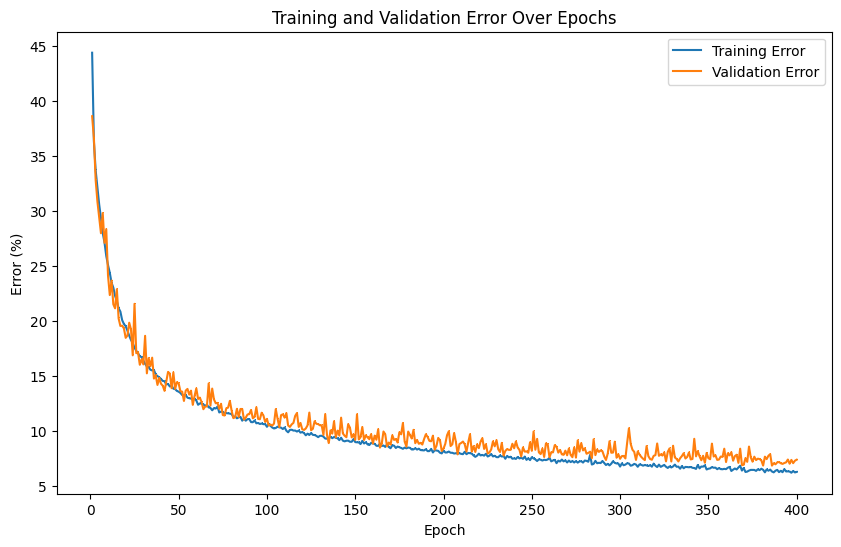

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_errors, label="Training Error", marker=",")
plt.plot(range(1, epochs + 1), val_errors, label="Validation Error", marker=",")

plt.title("Training and Validation Error Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

From our training and validation error curve we see that we have not reached a minimum just yet, although we see that after around 300 epochs, the errors decrease at a much slower rate than before. Since we have not yet reached a minimum, the graph does not show us the line of overfitting where the validation curve increases. We could run the model for a few hundred epochs more but even still we are not guaranteed to reach the "sweet spot" in our model. Because of this and hardware limitations, we only ran our model for 400 epochs. The validation curve does look as we would expect, it is slightly larger than our training error and follows the same trend as well. If we would reach the point of overfitting we could use dropout to turn off some neurons at every training step.  

# Task 8

In [24]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Turn off gradient calculation (saves memory)
    for features, labels in test_loader: # We make predictions on the test dataset
        outputs = model(features)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test accuracy: {test_accuracy:.2f}%")

Test accuracy: 92.56%


Our test accuracy of around 93% shows us that our model is very good at predicting the different classes and that our model architecture is sufficient for this task.